<h1 style="font-size:2em;color:#2467C0"> H-1B Visa Kaggle Data Analysis </h1>

In [146]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [147]:
data = pd.read_csv('h1b_kaggle.csv')
data.shape

(3002458, 11)

In [148]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [149]:
data.dtypes

Unnamed: 0              int64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object

In [150]:
data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [151]:
data.index

RangeIndex(start=0, stop=3002458, step=1)

In [152]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [153]:
case_status = data['CASE_STATUS'].unique().tolist()
len(case_status)

8

In [154]:
print(case_status)

['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED', 'REJECTED', 'INVALIDATED', 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan]


In [155]:
employer = data['EMPLOYER_NAME'].unique().tolist()
len(employer)

236014

In [156]:
profession = data['SOC_NAME'].unique().tolist()
len(profession)

2133

In [157]:
job = data['JOB_TITLE'].unique().tolist()
len(job)

287550

In [158]:
full_time_position = data['FULL_TIME_POSITION'].unique().tolist()
len(full_time_position)

3

In [159]:
print(full_time_position)

['N', 'Y', nan]


In [160]:
data['PREVAILING_WAGE'].describe()

count    3.002373e+06
mean     1.469984e+05
std      5.287609e+06
min      0.000000e+00
25%      5.437100e+04
50%      6.502100e+04
75%      8.143200e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

In [161]:
year = data['YEAR'].unique().tolist()
len(year)

7

In [162]:
print(year)

[2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0, nan]


In [163]:
work_site = data['WORKSITE'].unique().tolist()
len(work_site)

18622

In [164]:
data.isnull().any()

Unnamed: 0            False
CASE_STATUS            True
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                   True
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [165]:
data = data.dropna()

In [166]:
data.isnull().any()

Unnamed: 0            False
CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                   False
lat                   False
dtype: bool

<h1 style="font-size:2em;color:#2467C0">Visualization: Salary Data</h1>

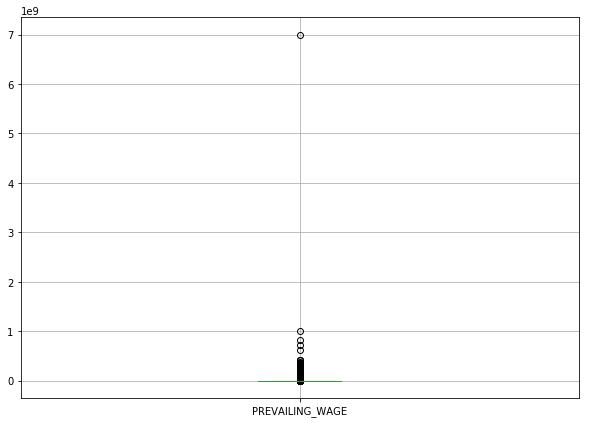

In [167]:
%matplotlib inline
data.boxplot(column='PREVAILING_WAGE', figsize=(10,7))

In [168]:
case_status_counts=data['CASE_STATUS'].value_counts()

In [170]:
len(data['CASE_STATUS'])

2877765

In [169]:
case_status_counts

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

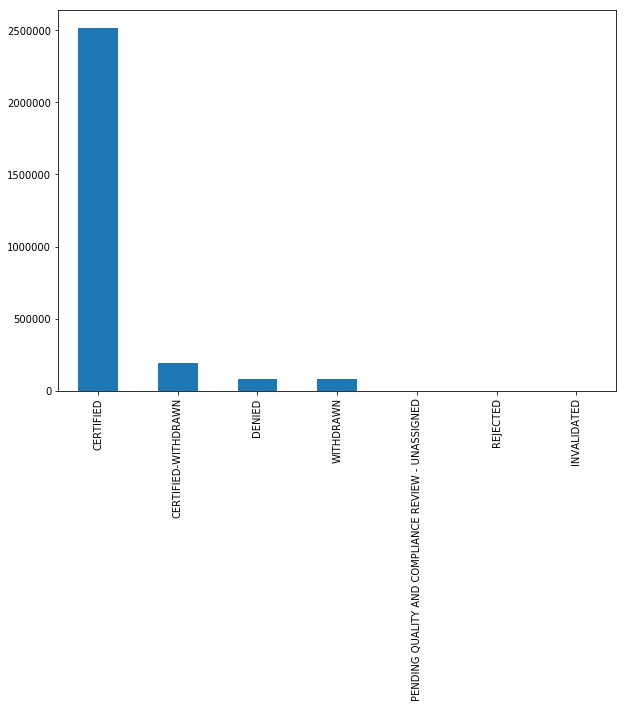

In [171]:
case_status_counts.plot(kind='bar',figsize=(10,7))

In [172]:
employer_counts=data['EMPLOYER_NAME'].value_counts()
employer_counts[:10]

INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
Name: EMPLOYER_NAME, dtype: int64

In [175]:
profession_counts=data['SOC_NAME'].value_counts()
profession_counts[:20]

Computer Systems Analysts                    286598
Computer Programmers                         222563
SOFTWARE DEVELOPERS, APPLICATIONS            218833
COMPUTER SYSTEMS ANALYSTS                    212579
Software Developers, Applications            190063
COMPUTER PROGRAMMERS                         169473
COMPUTER OCCUPATIONS, ALL OTHER              107370
Computer Occupations, All Other               68564
Software Developers, Systems Software         43723
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE         38921
Management Analysts                           37731
Financial Analysts                            33486
Computer Software Engineers, Applications     32766
Accountants and Auditors                      29239
MANAGEMENT ANALYSTS                           27598
Computer Occupations, All Other*              25313
Mechanical Engineers                          24102
Electronics Engineers, Except Computer        22934
Database Administrators                       21488
ACCOUNTANTS 

In [176]:
jobs_title_counts=data['JOB_TITLE'].value_counts()
jobs_title_counts[:20]

PROGRAMMER ANALYST             243357
SOFTWARE ENGINEER              118897
COMPUTER PROGRAMMER             68696
SYSTEMS ANALYST                 60754
SOFTWARE DEVELOPER              41875
BUSINESS ANALYST                38781
COMPUTER SYSTEMS ANALYST        34036
TECHNOLOGY LEAD - US            28307
SENIOR SOFTWARE ENGINEER        26617
TECHNOLOGY ANALYST - US         26010
ASSISTANT PROFESSOR             24436
SENIOR CONSULTANT               24120
CONSULTANT                      22643
PROJECT MANAGER                 19015
DATABASE ADMINISTRATOR          16108
PHYSICAL THERAPIST              14203
RESEARCH ASSOCIATE              13409
COMPUTER PROGRAMMER ANALYST     13116
ACCOUNTANT                      12934
DEVELOPER                       12737
Name: JOB_TITLE, dtype: int64

In [177]:
full_time_position_counts=data['FULL_TIME_POSITION'].value_counts()
full_time_position_counts[:20]

Y    2469721
N     408044
Name: FULL_TIME_POSITION, dtype: int64

In [178]:
year_counts=data['YEAR'].value_counts()
year_counts[:20]

2016.0    629299
2015.0    600120
2014.0    498027
2013.0    422427
2012.0    394267
2011.0    333625
Name: YEAR, dtype: int64

In [179]:
worksite_counts=data['WORKSITE'].value_counts()
worksite_counts[:20]

NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

# Is the number of petitions with Data Engineer job title increasing over time?

In [180]:
data_engineer=data['JOB_TITLE'].str.contains('DATA ENGINEER')
data[data_engineer][:5]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
8238,8239,CERTIFIED,"AMAZON WEB SERVICES, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,DATA ENGINEERING MANAGER III,Y,103875.0,2016.0,"SEATTLE, WASHINGTON",-122.332071,47.606209
8669,8670,CERTIFIED,EMC CORPORATION,COMPUTER AND INFORMATION SYSTEMS MANAGERS,"MANAGER, DATA ENGINEERING",Y,118414.0,2016.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
8823,8824,CERTIFIED,EMC CORPORATION,COMPUTER AND INFORMATION SYSTEMS MANAGERS,"MANAGER, DATA ENGINEERING",Y,138133.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784
9339,9340,CERTIFIED,"MYFITNESSPAL, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,HEAD OF DATA ENGINEERING & SCIENCE,Y,173056.0,2016.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
9535,9536,CERTIFIED,CEB INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,"DIRECTOR, BIG DATA ENGINEERING",Y,92373.0,2016.0,"CHAMPAIGN, ILLINOIS",-88.243383,40.116420


In [181]:
len(data[data_engineer])

1704

In [182]:
data_engineer=data[data_engineer]

In [201]:
data_engineer['JOB_TITLE'].head()

18885    DIRECTOR OF HARDWARE ENGINEERING
19018      DIRECTOR, HARDWARE ENGINEERING
19022      DIRECTOR, HARDWARE ENGINEERING
19031        MANAGER HARDWARE ENGINEERING
19287        MANAGER HARDWARE ENGINEERING
Name: JOB_TITLE, dtype: object

In [186]:
data_engineer_counts=data_engineer['YEAR'].value_counts()
data_engineer_counts

2016.0    781
2015.0    392
2014.0    245
2013.0    147
2012.0     80
2011.0     59
Name: YEAR, dtype: int64

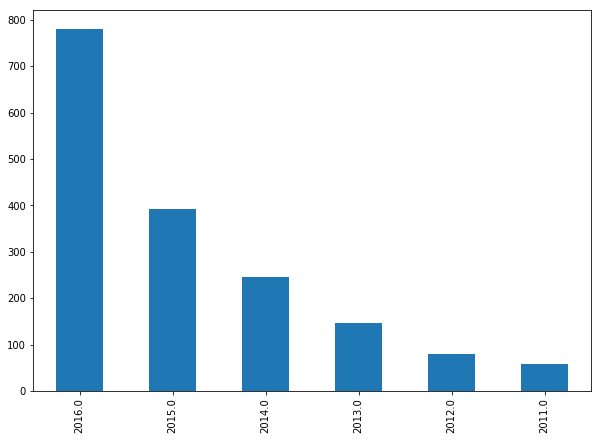

In [187]:
data_engineer_counts.plot(kind='bar',figsize=(10,7))

# Which part of the US has the most Hardware Engineer jobs?

In [192]:
hardware_engineer=(data['SOC_NAME'].str.contains('HARDWARE ENGINEER')) | (data['JOB_TITLE'].str.contains('HARDWARE ENGINEER'))
data[hardware_engineer][:5]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
18885,18886,CERTIFIED,"LEEO, INC.",ARCHITECTURAL AND ENGINEERING MANAGERS,DIRECTOR OF HARDWARE ENGINEERING,Y,130395.0,2016.0,"PALO ALTO, CALIFORNIA",-122.143020,37.441883
19018,19019,CERTIFIED,"QUALCOMM TECHNOLOGIES, INC.",ARCHITECTURAL AND ENGINEERING MANAGERS,"DIRECTOR, HARDWARE ENGINEERING",Y,157394.0,2016.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
19022,19023,CERTIFIED,"QUALCOMM TECHNOLOGIES, INC.",ARCHITECTURAL AND ENGINEERING MANAGERS,"DIRECTOR, HARDWARE ENGINEERING",Y,157394.0,2016.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
19031,19032,CERTIFIED,NVIDIA CORPORATION,ARCHITECTURAL AND ENGINEERING MANAGERS,MANAGER HARDWARE ENGINEERING,Y,167743.0,2016.0,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108
19287,19288,CERTIFIED,NVIDIA CORPORATION,ARCHITECTURAL AND ENGINEERING MANAGERS,MANAGER HARDWARE ENGINEERING,Y,171257.0,2016.0,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108


In [193]:
len(data[hardware_engineer])

8389

In [197]:
hardware_engineer=data[hardware_engineer]

In [199]:
hardware_engineer_counts=hardware_engineer['WORKSITE'].value_counts()
hardware_engineer_counts.head()

SAN DIEGO, CALIFORNIA      2866
SANTA CLARA, CALIFORNIA     916
SAN JOSE, CALIFORNIA        690
FOLSOM, CALIFORNIA          408
RALEIGH, NORTH CAROLINA     359
Name: WORKSITE, dtype: int64

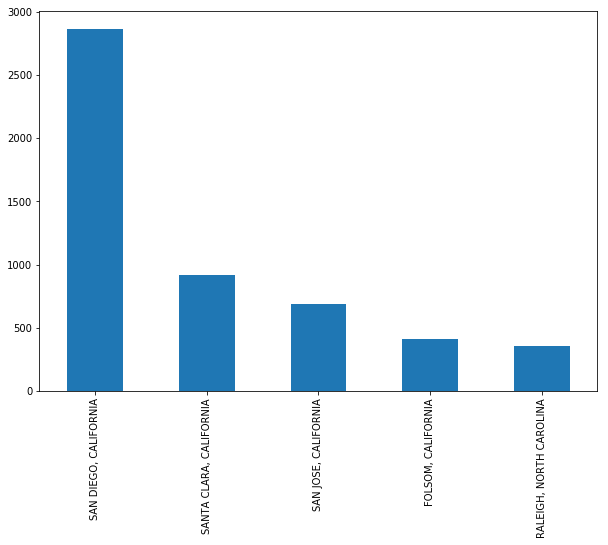

In [203]:
hardware_engineer_counts[:5].plot(kind='bar',figsize=(10,7))

# Which industry has the most number of Data Scientist positions?

In [208]:
data_scientist=(data['SOC_NAME'].str.contains('DATA SCIENTIST')) | (data['JOB_TITLE'].str.contains('DATA SCIENTIST'))
data[data_scientist][:5]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
8793,8794,CERTIFIED,MEMORIAL SLOAN-KETTERING CANCER CENTER,COMPUTER AND INFORMATION SYSTEMS MANAGERS,"SENIOR DATA SCIENTIST, DESIGN",Y,82035.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784
10022,10023,CERTIFIED,"SMARKING, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,CHIEF DATA SCIENTIST,Y,118414.0,2016.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
11523,11524,CERTIFIED,INTEGRAL AD SCIENCE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SENIOR DATA SCIENTIST,Y,169541.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784
12612,12613,CERTIFIED,"BENEFITFOCUS.COM, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,DATA SCIENTIST,Y,104333.0,2016.0,"CHARLESTON, SOUTH CAROLINA",-79.931051,32.776475
32948,32949,CERTIFIED,"COMCAST CABLE COMMUNICATIONS, LLC",MANAGEMENT ANALYSTS,ASSOCIATE DATA SCIENTIST,N,55973.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784


In [209]:
data_scientist=data[data_scientist]
len(data_scientist)

3129

In [211]:
data_scientist_counts=data_scientist['EMPLOYER_NAME'].value_counts()
data_scientist_counts.head(10)

MICROSOFT CORPORATION        188
FACEBOOK, INC.               118
LINKEDIN CORPORATION          86
TWITTER, INC.                 55
UBER TECHNOLOGIES, INC.       54
WAL-MART ASSOCIATES, INC.     45
GROUPON, INC.                 31
PAYPAL, INC.                  30
NETFLIX, INC.                 29
IBM CORPORATION               26
Name: EMPLOYER_NAME, dtype: int64

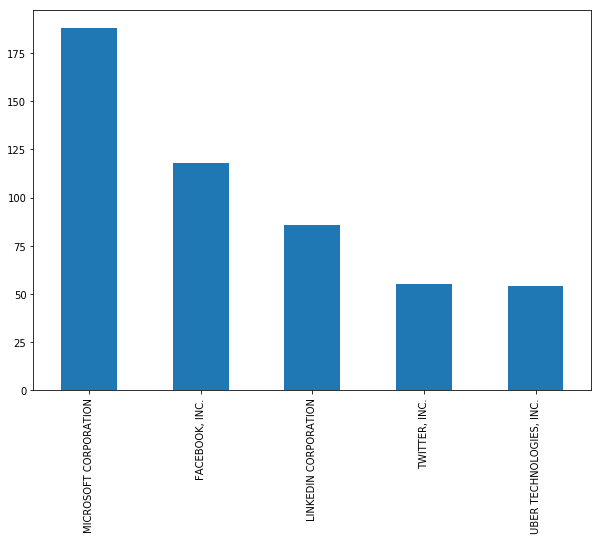

In [212]:
data_scientist_counts[:5].plot(kind='bar',figsize=(10,7))

# Which employers file the most petitions each year?

In [213]:
employer_counts=data['EMPLOYER_NAME'].value_counts()
employer_counts[:10]

INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
Name: EMPLOYER_NAME, dtype: int64

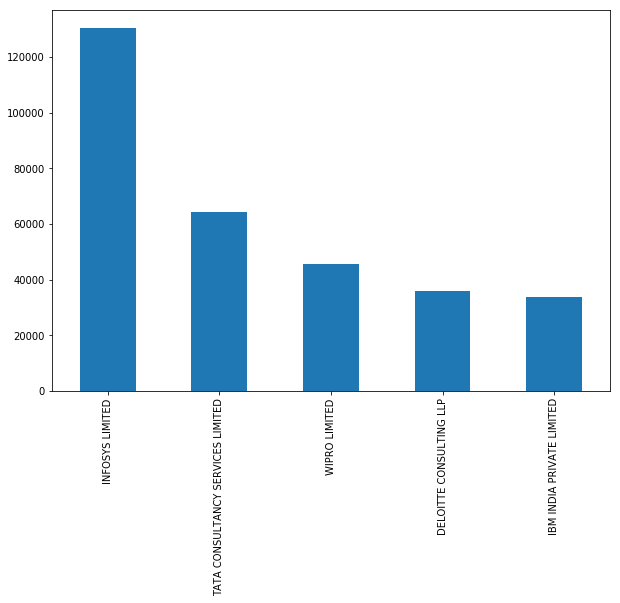

In [215]:
employer_counts[:5].plot(kind='bar',figsize=(10,7))